<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/Dnn_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 임포팅

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

# Keras DNN 최소코드

# 데이터 준비 

1차원 데이터 x와 x**2의 1차원 데이터 y

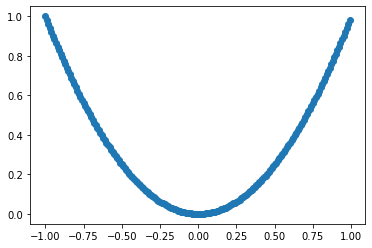

In [47]:
x = np.arange(-1,1,0.01)
y = x**2

plt.scatter(x,y)

In [48]:
print(len(x))
print(x.shape)

200
(200,)


## 최소 코드

아래의 코드는 최소 코드

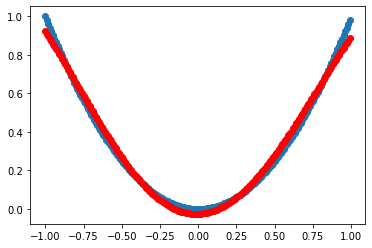

In [49]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras 
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

#모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#컴파일 : 모델 + optimizer + loss 
model.compile(optimizer="SGD", loss="mse")

#학습 
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#예측 
y_ = model.predict(x)

#결과 그래프로 보기
plt.scatter(x,y) #정답
plt.scatter(x,y_,color='r')# 결과 
plt.show()

# Keras DNN 최소 코드에 기본 정보만 추가

최소는 아니고, 이정도는 매번 사용하는 코드

## model,evaluate() - 성능 평가하기 

7/7 [==============================] - 0s 2ms/step - loss: 0.0019 - mae: 0.0366
loss= 0.0019302351865917444
mae= 0.03657213971018791


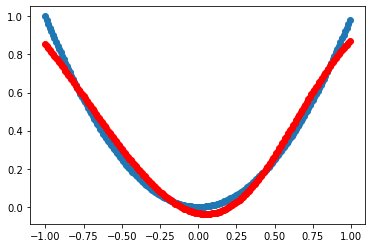

In [50]:
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#모델 훈련
model.fit(x, y, epochs=1000, verbose=0, batch_size=20)

#출력에 loss와 mae가 추가되었다
loss, mae = model.evaluate(x, y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(x)

plt.scatter(x,y)
plt.scatter(x,y_,color='r')
plt.show()


#테스트셋으로 평가하기

데이터를 train과 test으로 나우어 준비한다.

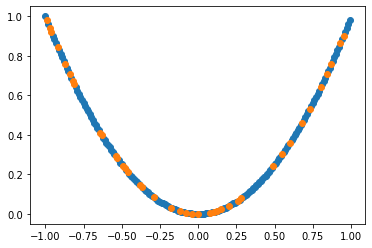

In [51]:
x = np.arange(-1,1,0.01)
np.random.shuffle(x)
y = x**2

i = int(x.shape[0]*0.8)

train_x, test_x = x[:i], x[i:]
train_y, test_y = y[:i], y[i:]

plt.scatter(train_x, train_y)
plt.scatter(test_x, test_y)
plt.show() 

2/2 [==============================] - 0s 5ms/step - loss: 0.0015 - mae: 0.0305
loss= 0.0014529384206980467
mae= 0.03048698976635933


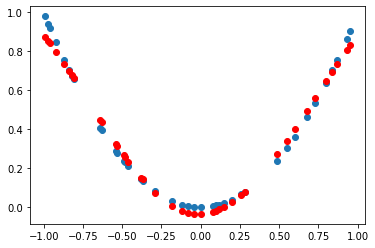

In [52]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

#모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#model.fit(x, y, epochs=1000, verbose=0, batch_size=20)
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

#출력에 loss와 mae가 추가되었다
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

#y_ = model.predict(x)
y_ = model.predict(test_x)

#plt.scatter(x,y)
plt.scatter(test_x,test_y)

#plt.scatter(x,y_,color='r')
plt.scatter(test_x,y_,color='r')
plt.show()

train_x, train_y로 학습, evaluate()와 predict()는 test_x, test_y를 사용함

그려진 그림에서 test_x의 점 사이에 빈간격은 train_x에 해당한다. 

#Base Model 결과 저장

이후 비교를 위해 그래프를 저장해 둔다.

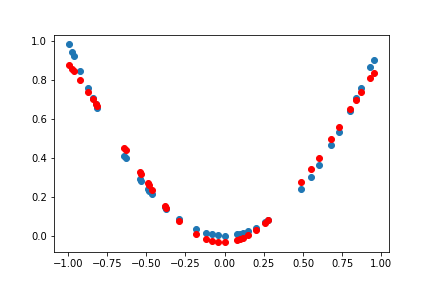

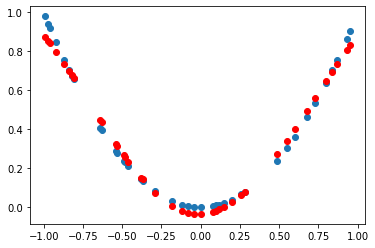

In [53]:
plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.savefig("graph_result.png")

from IPython.display import Image
display(Image("graph_result.png"))

## 학습 시간을 출력

elapsed : 11.544894933700562
2/2 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0383
loss= 0.002281495835632086
mae= 0.038300901651382446


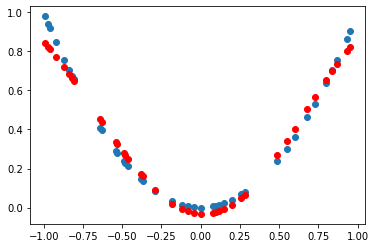

In [54]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])

#학습 시간을 출력
start_time = time.time()  # <-------추가----------
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}". format(time.time() - start_time)) # <-------추가----------

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## model.summary() 네트워크 모양 보기

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 10)                20        
                                                                 
 dense_103 (Dense)           (None, 10)                110       
                                                                 
 dense_104 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.572643280029297
2/2 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0404
loss= 0.0024043559096753597
mae= 0.04036037251353264


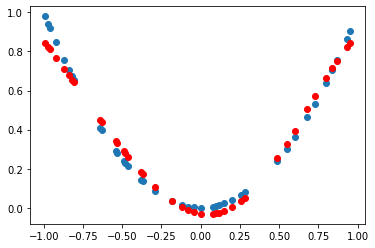

In [55]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary() # <-------추가----------

start_time = time.time()  
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}". format(time.time() - start_time)) 

loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

노드 10개, 10개를 갖는 은닉층이 2개
모든 레이어는 activation(w*x+b)의 형태로,

첫번쨰 은닉층은 [ 20개 = (1+1)*10 = (입력수+1)*10 ]

두번쨰 은닉층은 [ 110개 = (10+1)*10 ]
의 가중치가 있다. 

## 모델 그리기


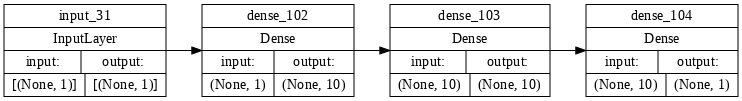

In [56]:
tf.keras.utils.plot_model(model=model, rankdir="LR", dpi=72, show_shapes=True)

# Keras DNN Template

본 실습에 사용되는 코드의 템플릿

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 10)                20        
                                                                 
 dense_106 (Dense)           (None, 10)                110       
                                                                 
 dense_107 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.55567979812622
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - mae: 0.0327
loss= 0.001847599633038044
mae= 0.032676711678504944


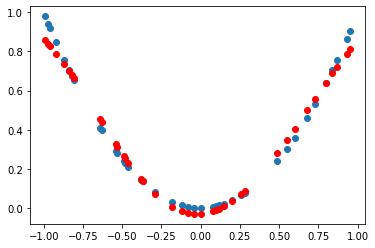

In [57]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time


# 모델 정의
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))


# 모델 컴파일
model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


# 학습
start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))


# 평가
loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# 예측
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# layer 수

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

## 히든 레이어 1개

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 10)                20        
                                                                 
 dense_109 (Dense)           (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.974165678024292
2/2 [==============================] - 0s 5ms/step - loss: 0.0031 - mae: 0.0430
loss= 0.0031346112955361605
mae= 0.04299607500433922


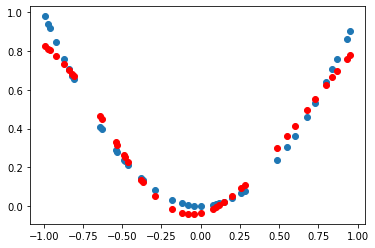

In [59]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # <-------추가----------

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든 레이어 5개일 떄 

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 10)                20        
                                                                 
 dense_111 (Dense)           (None, 10)                110       
                                                                 
 dense_112 (Dense)           (None, 10)                110       
                                                                 
 dense_113 (Dense)           (None, 10)                110       
                                                                 
 dense_114 (Dense)           (None, 10)                110       
                                                                 
 dense_115 (Dense)           (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable

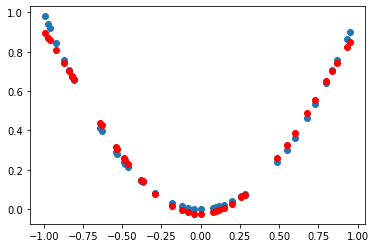

In [60]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든 레이어 10개

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 10)                20        
                                                                 
 dense_117 (Dense)           (None, 10)                110       
                                                                 
 dense_118 (Dense)           (None, 10)                110       
                                                                 
 dense_119 (Dense)           (None, 10)                110       
                                                                 
 dense_120 (Dense)           (None, 10)                110       
                                                                 
 dense_121 (Dense)           (None, 10)                110       
                                                                 
 dense_122 (Dense)           (None, 10)              

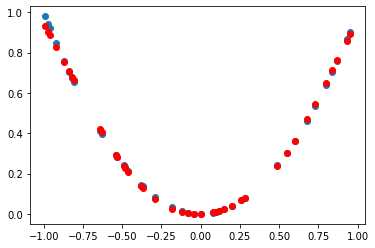

In [61]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 
y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 히든 레이어 없을 때

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
elapsed : 10.350422620773315
2/2 [==============================] - 0s 4ms/step - loss: 0.1106 - mae: 0.2838
loss= 0.11056938022375107
mae= 0.2837847173213959


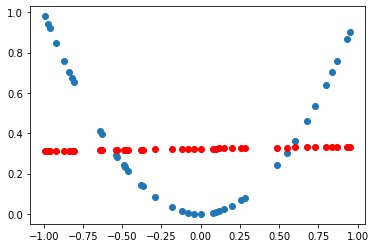

In [62]:
model = keras.Sequential()
model.add(Input(1))
#model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)


# base 모델의 결과
display(Image("base_result.png")) # <-------추가----------

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# node 수

## 노드 : 10

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_128 (Dense)           (None, 10)                20        
                                                                 
 dense_129 (Dense)           (None, 10)                110       
                                                                 
 dense_130 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.609582424163818
2/2 [==============================] - 0s 5ms/step - loss: 0.0023 - mae: 0.0375
loss= 0.002326693618670106
mae= 0.037472400814294815


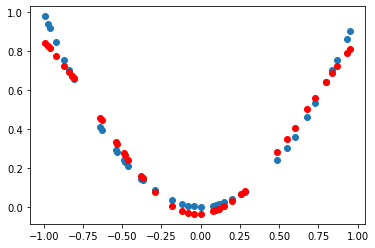

In [64]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(10, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 노드 : 5

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 5)                 10        
                                                                 
 dense_132 (Dense)           (None, 5)                 30        
                                                                 
 dense_133 (Dense)           (None, 1)                 6         
                                                                 
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.433521270751953
2/2 [==============================] - 0s 5ms/step - loss: 0.0048 - mae: 0.0569
loss= 0.004804770462214947
mae= 0.05693140625953674


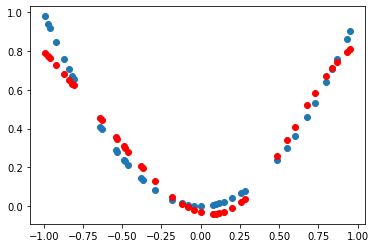

In [65]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(5, activation='tanh')) # <-------추가----------
model.add(Dense(5, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 노드 : 1

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_134 (Dense)           (None, 1)                 2         
                                                                 
 dense_135 (Dense)           (None, 1)                 2         
                                                                 
 dense_136 (Dense)           (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
elapsed : 11.457273244857788
2/2 [==============================] - 0s 4ms/step - loss: 0.1103 - mae: 0.2838
loss= 0.11030864715576172
mae= 0.2838141918182373


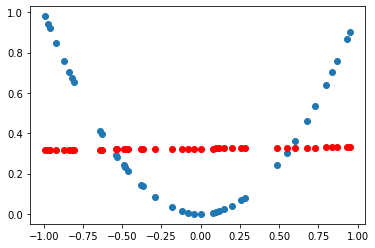

In [66]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(1, activation='tanh')) # <-------추가----------
model.add(Dense(1, activation='tanh')) # <-------추가----------
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

display(Image("base_result.png")) 

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

# sin 데이터 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

import time

In [68]:
def sin_data(start=0, end=10, step=0.1):
  x = np.arange(start,end,step)
  np.random.shuffle(x)
  y = np.sin(x)

  i = int(x.shape[0]*0.6)

  train_x, test_x = x[:i], x[i:]
  train_y, test_y = y[:i], y[i:]

  return (train_x, train_y), (test_x, test_y)

# 학습 추가 진행

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf 
from tensorflow import keras 

import time

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

모델은 그대로 데이터만 sin 데이터로 변경


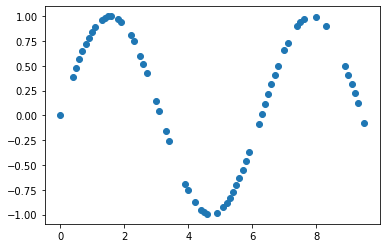

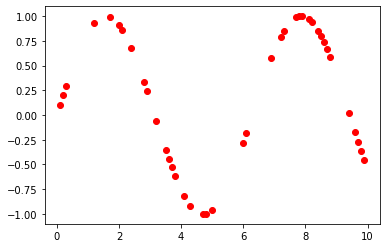

In [70]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

plt.scatter(train_x, train_y)
plt.show()

plt.scatter(test_x, test_y, color='r')
plt.show()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_137 (Dense)           (None, 10)                20        
                                                                 
 dense_138 (Dense)           (None, 10)                110       
                                                                 
 dense_139 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
elapsed : 5.490049839019775
2/2 [==============================] - 0s 4ms/step - loss: 0.2252 - mae: 0.3468
loss= 0.22524294257164001
mae= 0.34679490327835083


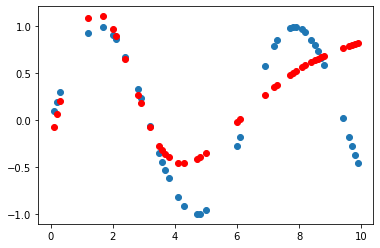

In [71]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh')) 
model.add(Dense(1))


model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()


start_time = time.time()
model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("elapsed : {}".format(time.time() - start_time))    


loss, mae = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mae=", mae)

y_ = model.predict(test_x)

plt.scatter(test_x,test_y)
plt.scatter(test_x,y_,color='r')
plt.show()

## 추가 학습 진행

In [74]:
def fit_one_more(model, train_x, train_y, test_x, test_y, batch_size=20):
  
  start_time = time.time()
  model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=batch_size)
  print("출력 시간: {}".format(time.time() - start_time))

  y_ = model.predict(test_x)

  plt.scatter(test_x,test_y)
  plt.scatter(test_x,y_,color='r')
  plt.show()

def fit_n_times(model, train_x, train_y, test_x, test_y, n):
  
  for i in range(n):
    print("학습 횟수 : {}: ".format(i))
    fit_one_more(model, train_x, train_y, test_x, test_y)

학습 횟수 : 0: 
출력 시간: 5.923537969589233


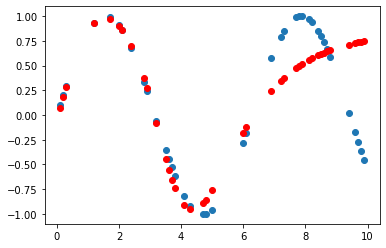

학습 횟수 : 1: 
출력 시간: 5.21897292137146


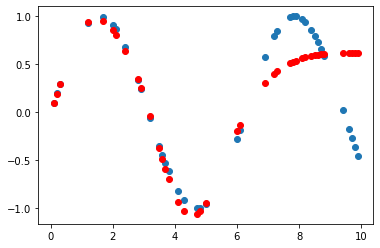

학습 횟수 : 2: 
출력 시간: 5.245174169540405


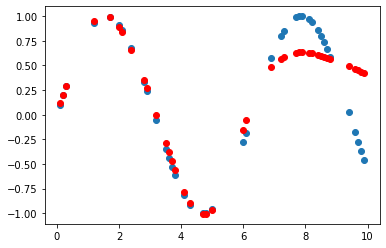

학습 횟수 : 3: 
출력 시간: 5.201696157455444


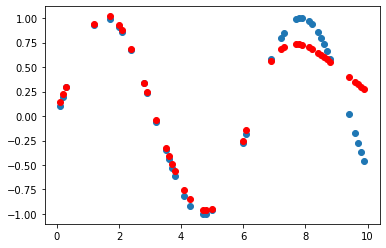

학습 횟수 : 4: 
출력 시간: 5.240151643753052


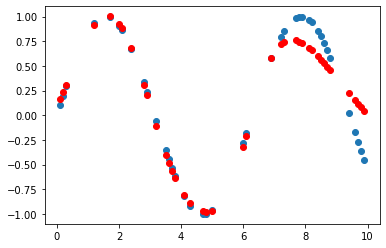

학습 횟수 : 5: 
출력 시간: 5.269232988357544


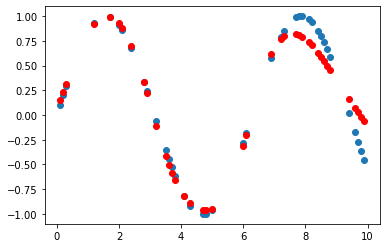

학습 횟수 : 6: 
출력 시간: 5.247742176055908


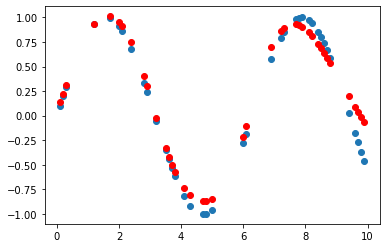

학습 횟수 : 7: 
출력 시간: 6.0813281536102295


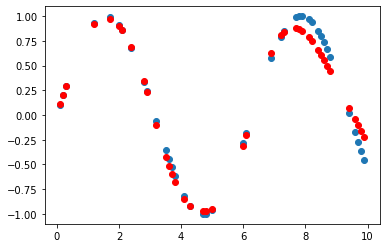

학습 횟수 : 8: 
출력 시간: 5.153111219406128


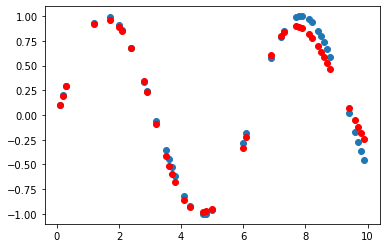

학습 횟수 : 9: 
출력 시간: 5.207856893539429


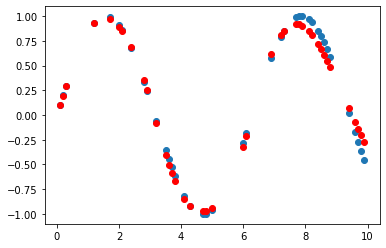

In [75]:
fit_n_times(model, train_x, train_y, test_x, test_y, 10)

# model.fit()의 batch_size

<br>
batch_size는 GPU와 관련된 옵션이다. 

한번에 GPU에 보내는 데이터의 수이다.

<br>
batch_sizer가 1일 경우, 1개를 보내고, 1개의 결과를 받고 1번 가중치를 업데이트한다.

batch_size가 10일 경우, 10개를 보내고, 10개의 결과를 한번에 받고 1번 가중치를 업데이트한다.

<br>
GPU는 보통 수천개의 코어를 가지고 있다. 동시에 꽤 많은 연산을 처리할 수 있다. 그런데 데이터 수가 적으면 대부분은 사용하지 못하고 일부만 연산에 사용된다.

복수의 데이터를 한번에 보내어 한번에 연산을 할 수 있고, 그 결과를 반환할 수 있다. 이런 방법으로 연산시간을 줄일 수 있다. 

하지만, 복수의 데이터를 한번에 보내는 경우 한번에 보낸 결과가 한번에 오고 1번 업데이트 되면서 업데이트 되는 사항이 뭉개지는 단점이 있다. 



In [76]:
def build_model():
  
  model = keras.Sequential()
  model.add(Input(1))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(10, activation='tanh'))
  model.add(Dense(1))

  model.compile(optimizer="SGD", loss="mse", metrics=['mse'])

  return model

def fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes):

  for batch_size in batch_sizes:
    model = build_model()
    print("batch_size={}".format(batch_size))
    fit_one_more(model, train_x, train_y, test_x, test_y, batch_size) 

In [77]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

## batch_size 적용 :[1,2,5,10,20,50,100,200,500]

batch_size=1
출력 시간: 73.14003539085388


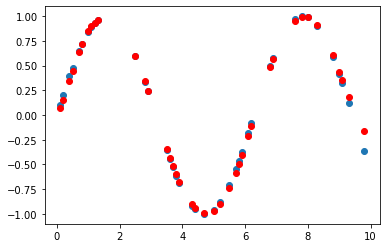

batch_size=2
출력 시간: 37.01686358451843


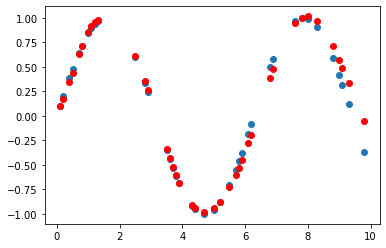

batch_size=5
출력 시간: 16.09723162651062


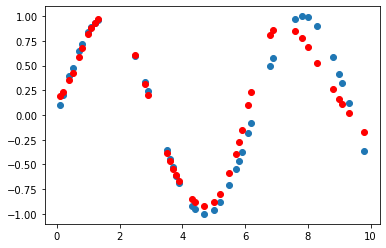

batch_size=10
출력 시간: 8.869474649429321


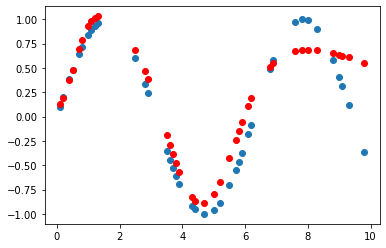

batch_size=20
출력 시간: 5.384797811508179


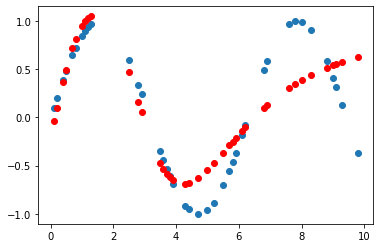

batch_size=50
출력 시간: 4.77660346031189


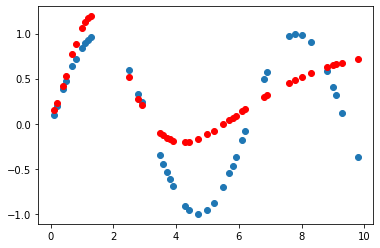

batch_size=100
출력 시간: 3.2548999786376953


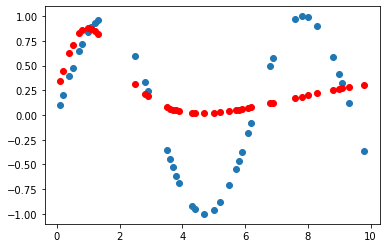

batch_size=200
출력 시간: 3.3020577430725098


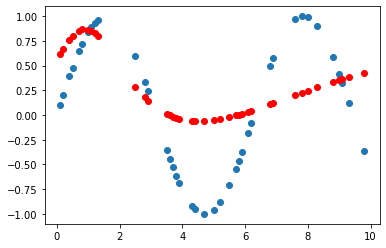

batch_size=500
출력 시간: 3.2823848724365234


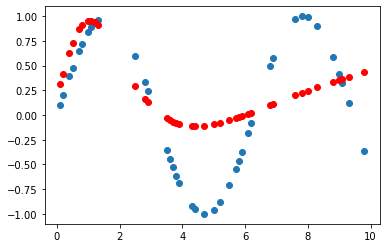

In [80]:
fit_with_batch_sizes(train_x, train_y, test_x, test_y, batch_sizes=[1,2,5,10,20,50,100,200,500])

batch_size를 키우면, 시간은 줄어들지만 학습이 빠르게 진행되지 않는다.

# model.fit() verbose

- 0 : 진행하면서 아무런 출력 없이
- 1 : 진행하면서 출력과 같이 

In [81]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.0001)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

print(train_x.shape)

start_time = time.time()
model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=20)
print("출력 시간 : {}".format(time.time() - start_time))

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 10)                20        
                                                                 
 dense_168 (Dense)           (None, 10)                110       
                                                                 
 dense_169 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
(60000,)
Epoch 1/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.2601 - mae: 0.4237
Epoch 2/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.1181 - mae: 0.2383
Epoch 3/5
3000/3000 [==============================] - 5s 2ms/step - loss: 0.0672 - mae: 0.1551
Epoch 4/5
3000/3000 [=

# loss 보기 

In [83]:
(train_x, train_y), (test_x, test_y) = sin_data(start=0, end=10, step=0.1)

model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mae"])
model.summary()

start_time = time.time()
history = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
print("출력 시간: {}".format(time.time() - start_time))

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 10)                20        
                                                                 
 dense_171 (Dense)           (None, 10)                110       
                                                                 
 dense_172 (Dense)           (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
출력 시간: 5.359507083892822


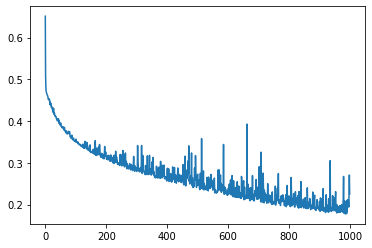

In [84]:
plt.plot(history.history['loss'])
plt.show()